# Pymaceuticals Inc.
---

### Analysis

The data being examined in this assignment deals with mice who have tumors and the drugs used to treat them. The available data is: mouse ID, timepoint, tumor volume (mm3), metastatic sites, drug regimen, sex, age in months, and weight in grams. 

The data is cleaned up to removed duplicate entries. The cleaned data is then used to generate summary statistics, which includes the mean, median, variance, standard deviation, and standard error for average tumore volume by drug regimen.

The bar graph shows the number of rows of data available for each drug regimen. More occurences mean that the drug has more available data.

The pie chart shows the sex breakdown of the mice being studied. Since the split is 49 percent female to 51 percent male, there is not much skew in the dataset from sex of the mice being studied.
 
Outliers, lower, and upper quartiles of specific drugs (Capomulin, Ramicane, Infubinol, and Ceftamin) are evaluated and the results are displayed in a box & whisker plot. From the plot, it can be determined that usage of the Capomulin or Ramicane regimen results in smaller final tumor size than the Infubinol or Ceftamin treatments.

The line graph for the Capomulin treatment of Mouse I897 shows that the mouse's tumor dereased in volume over the overall treatment.

The scatter plot and the scatter plot with regression line show that mice that weigh more tend to have tumors that are larger in volume. 

In [294]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata,how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df[combined_df.duplicated()]
duplicate_id = duplicates.tail()['Mouse ID'].values[0]
duplicate_id

'g989'

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse_id_data = combined_df[combined_df['Mouse ID'] == duplicate_id]
dup_mouse_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_combined_df = combined_df[(combined_df['Mouse ID']!='g989')]
clean_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [57]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_df["Mouse ID"].unique())

248

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

clean_combined_df_short = clean_combined_df.drop(['Mouse ID','Timepoint','Metastatic Sites','Sex','Age_months','Weight (g)'],axis=1)

mean_tumor_vol = clean_combined_df_short.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.mean)
median_tumor_vol = clean_combined_df_short.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.median)
tumor_vol_var = clean_combined_df_short.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.var)
tumor_vol_std = clean_combined_df_short.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.std)
tumor_vol_std_err = clean_combined_df_short.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(st.sem)

summary_stats = pd.DataFrame({
    'Mean Tumor Vol': mean_tumor_vol,
    'Median Tumor Volume': median_tumor_vol,
    'Tumor Volume Variance': tumor_vol_var,
    'Tumor Volume Std. Dev.': tumor_vol_std,
    'Tumor Volume Std. Error': tumor_vol_std_err
})
summary_stats


C:\Users\Cait\AppData\Local\Temp\ipykernel_14340\3849962535.py:9: FutureWarning: The provided callable <function mean at 0x000001D72556B9C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_tumor_vol = clean_combined_df_short.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.mean)
C:\Users\Cait\AppData\Local\Temp\ipykernel_14340\3849962535.py:10: FutureWarning: The provided callable <function median at 0x000001D7256CBEC0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  median_tumor_vol = clean_combined_df_short.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.median)
C:\Users\Cait\AppData\Local\Temp\ipykernel_14340\3849962535.py:11: FutureWarning: The provided callable <function var at 0x000001D72556BD80> is currently using

,Mean Tumor Vol,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [105]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
print(clean_combined_df_short.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,st.sem]))

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


C:\Users\Cait\AppData\Local\Temp\ipykernel_14340\3247747950.py:5: FutureWarning: The provided callable <function mean at 0x000001D72556B9C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(clean_combined_df_short.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,st.sem]))
C:\Users\Cait\AppData\Local\Temp\ipykernel_14340\3247747950.py:5: FutureWarning: The provided callable <function median at 0x000001D7256CBEC0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(clean_combined_df_short.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,st.sem]))
C:\Users\Cait\AppData\Local\Temp\ipykernel_14340\3247747950.py:5: FutureWarning: The provided callable <function var a

## Bar and Pie Charts

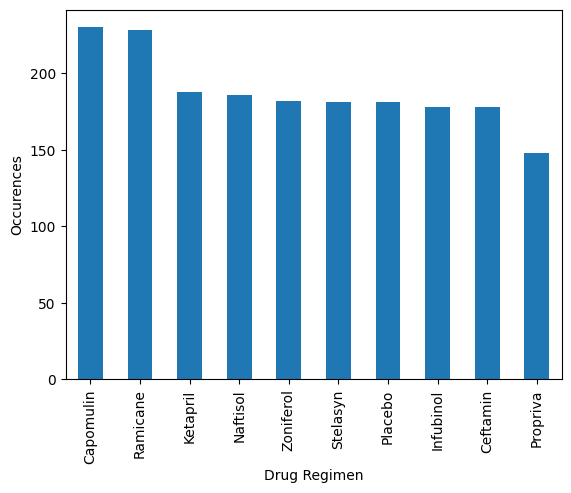

In [166]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Since we are plotting occurences of each drug regimen, value counts is useful
df = clean_combined_df['Drug Regimen'].value_counts()
panda_plot = df.plot.bar(ylabel='Occurences')

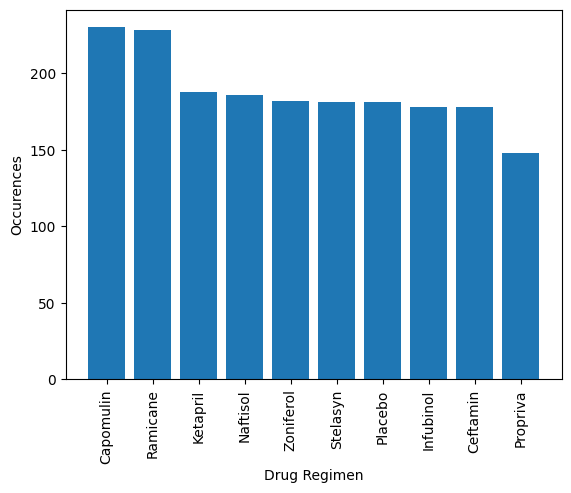

In [165]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = df.index.values
y = df.values
plt.bar(x,y)
plt.xlabel('Drug Regimen')
plt.ylabel('Occurences')
plt.xticks(rotation='vertical')
plt.show()

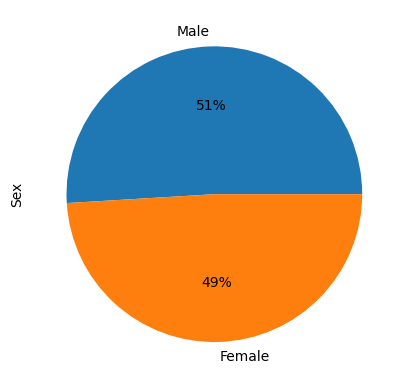

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df2= clean_combined_df['Sex'].value_counts()
panda_pie = df2.plot(kind='pie',ylabel='Sex',autopct='%1.0f%%')


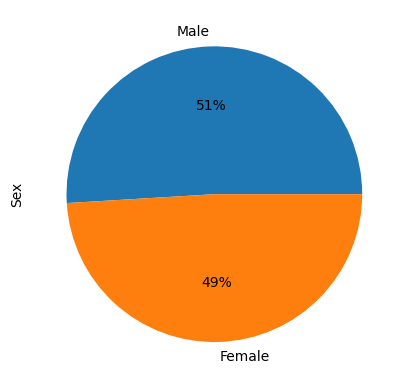

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_pie = df2.plot.pie(autopct='%1.0f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [222]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin_data = clean_combined_df.loc[clean_combined_df['Drug Regimen']=='Capomulin']
capomulin_last = capomulin_data.groupby('Mouse ID').max()['Timepoint']
ramicane_data = clean_combined_df.loc[clean_combined_df['Drug Regimen']=='Ramicane']
ramicane_last = ramicane_data.groupby('Mouse ID').max()['Timepoint']
infubinol_data = clean_combined_df.loc[clean_combined_df['Drug Regimen']=='Infubinol']
infubinol_last = infubinol_data.groupby('Mouse ID').max()['Timepoint']
ceftamin_data = clean_combined_df.loc[clean_combined_df['Drug Regimen']=='Ceftamin']
ceftamin_last = ceftamin_data.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulin_df = pd.DataFrame(capomulin_last)
cap_merged = pd.merge(capomulin_df,clean_combined_df,on=('Mouse ID',"Timepoint"),how='left')

ramicane_df = pd.DataFrame(ramicane_last)
ram_merged = pd.merge(ramicane_df,clean_combined_df,on=('Mouse ID',"Timepoint"),how='left')
merge1 = pd.merge(cap_merged,ram_merged,how='outer')

infubinol_df = pd.DataFrame(infubinol_last)
inf_merged = pd.merge(infubinol_df,clean_combined_df,on=('Mouse ID',"Timepoint"),how='left')
merge2 = pd.merge(merge1,inf_merged,how='outer')

ceftamin_df = pd.DataFrame(ceftamin_last)
cef_merged = pd.merge(ceftamin_df,clean_combined_df,on=('Mouse ID',"Timepoint"),how='left')
merge3 = pd.merge(merge2,cef_merged,how='outer')

# Merge 3 is the dataframe that holds all of the merged data together
merge3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,0,45.000000,0,Ceftamin,Male,23,28
96,x581,45,64.634949,3,Ceftamin,Female,19,28
97,x822,45,61.386660,3,Ceftamin,Male,3,29
98,y769,45,68.594745,4,Ceftamin,Female,6,27


In [315]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = merge3['Drug Regimen'].unique()
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
cap_tumors = merge3.loc[merge3['Drug Regimen']=='Capomulin']
cap_tumors = cap_tumors['Tumor Volume (mm3)']
ram_tumors = merge3.loc[merge3['Drug Regimen']=='Ramicane']
ram_tumors = ram_tumors['Tumor Volume (mm3)']
inf_tumors = merge3.loc[merge3['Drug Regimen']=='Infubinol']
inf_tumors = inf_tumors['Tumor Volume (mm3)']
cef_tumors = merge3.loc[merge3['Drug Regimen']=='Ceftamin']
cef_tumors = cef_tumors['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

# Capomulin
quartiles_cap = cap_tumors.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f'Potential Outliers for Capomulin are values below {lower_bound_cap} and above {upper_bound_cap}')

# Ramican
quartiles_ram = ram_tumors.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f'Potential Outliers for Ramicane are values below {lower_bound_ram} and above {upper_bound_ram}')

# Infubinol
quartiles_inf = inf_tumors.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f'Potential Outliers for Infubinol are values below {lower_bound_inf} and above {upper_bound_inf}')

# Ceftamin
quartiles_cef = cef_tumors.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f'Potential Outliers for Ceftamin are values below {lower_bound_cef} and above {upper_bound_cef}')

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [cap_tumors,ram_tumors,inf_tumors,cef_tumors]


Potential Outliers for Capomulin are values below 20.70456164999999 and above 51.83201549
Potential Outliers for Ramicane are values below 17.912664470000003 and above 54.30681135
Potential Outliers for Infubinol are values below 36.83290494999999 and above 82.74144559000001
Potential Outliers for Ceftamin are values below 25.355449580000002 and above 87.66645829999999


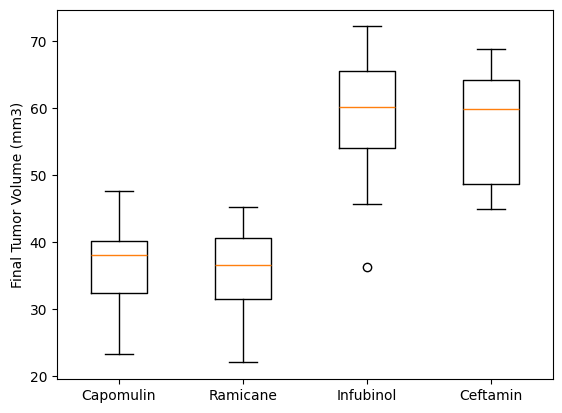

In [319]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels=labels)

plt.show()

## Line and Scatter Plots

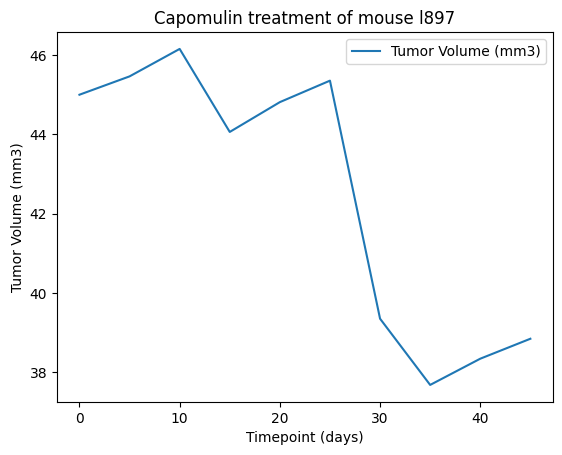

In [239]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_scatter = capomulin_data[(capomulin_data['Mouse ID']=='l897')]
capomulin_scatter.plot(x='Timepoint',y='Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l897')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

C:\Users\Cait\AppData\Local\Temp\ipykernel_14340\1562489849.py:3: FutureWarning: The provided callable <function mean at 0x000001D72556B9C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_tumor_vol = cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].agg(np.mean)
C:\Users\Cait\AppData\Local\Temp\ipykernel_14340\1562489849.py:4: FutureWarning: The provided callable <function mean at 0x000001D72556B9C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mouse_weight = cap_df.groupby('Mouse ID')['Weight (g)'].agg(np.mean)


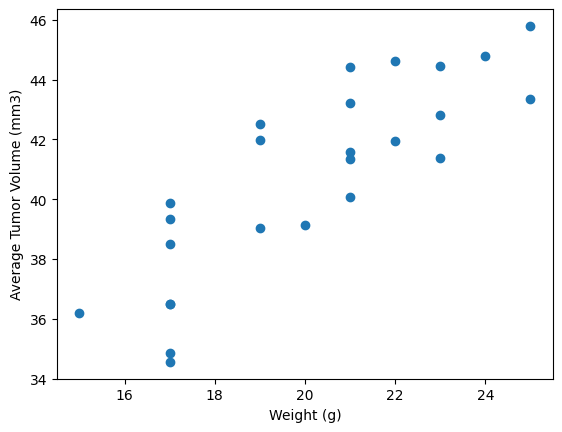

In [293]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = clean_combined_df.loc[clean_combined_df['Drug Regimen']=='Capomulin',:]
mean_tumor_vol = cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].agg(np.mean)
mouse_weight = cap_df.groupby('Mouse ID')['Weight (g)'].agg(np.mean)
plt.scatter(mouse_weight,mean_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

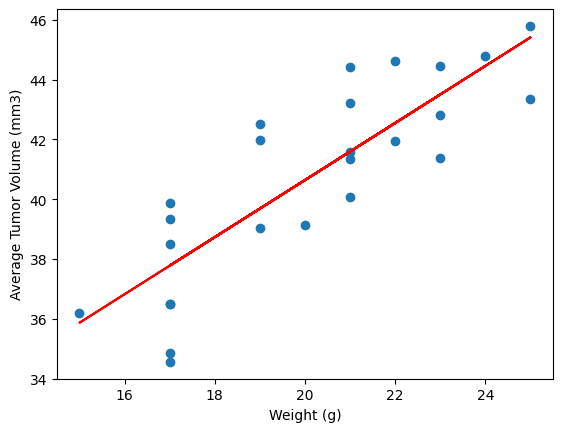

In [296]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight,mean_tumor_vol)
regress_values = mouse_weight * slope + intercept
plt.scatter(mouse_weight,mean_tumor_vol)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()